In [1]:
import os
import h5py

In [15]:
from matplotlib import pyplot as plt

In [17]:
from random import randint

In [35]:
rand_tp = [randint(2,50) for i in range(0,10)]

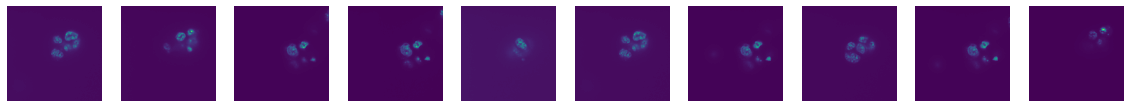

In [36]:
fig, ax = plt.subplots(1,10, figsize=(20,12))
for k,i in enumerate(rand_tp):
    img = f['/DataSet/ResolutionLevel 0/TimePoint '+str(i)+'/Channel 0/Data']
    ax[k].imshow(img[12,:,:])
    ax[k].axis('off')

In [37]:
hf = h5py.File(os.path.join('../../data/dl-course-2022/testdata/',
                    os.path.basename(test_mov).replace('.ims',''))+'.h5', 'w')
hf.create_dataset('raw', data=img)
hf.close()

In [38]:
f.close()

In [42]:
movie_dir = '../../data/dl-course-2022/testdata/movies/'

In [43]:
ims_files = os.listdir(movie_dir)

In [45]:
ims_files

['2020-06-19_14.40.04_SH045_F10.ims', '2020-06-19_14.40.04_SH045_F03.ims']

In [46]:
for ims_file in ims_files:
    print(ims_file)
    f = h5py.File(os.path.join(movie_dir,ims_file), 'r')
    # randomly pick 10 time points in the first 50
    rand_tp = [randint(2,50) for i in range(0,10)]
    for k,i in enumerate(rand_tp):
        # read the nuclei data from channel 0
        img = f['/DataSet/ResolutionLevel 0/TimePoint '+str(i)+'/Channel 0/Data']
        hf = h5py.File(os.path.join('../../data/dl-course-2022/testdata/h5',
                    os.path.basename(ims_file).replace('.ims','')+'_'+str(i))+'.h5', 'w')
        hf.create_dataset('raw', data=img)
        # close the new file
        hf.close()
    # close the imaris file
    f.close()

2020-06-19_14.40.04_SH045_F10.ims
2020-06-19_14.40.04_SH045_F03.ims
